In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(101)
tf.set_random_seed(101)

## Full Network Example
Let's work on a regression example, we are trying to solve a very simple equation:

y = mx + b

y will be the y_labels and x is x_data. We are trying ti figure out the slope and intercept to best fits our data!

### Aritifical Data (Some Made Up Regression Data)

In [3]:
x_data = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)

In [5]:
x_data

array([0.04919588, 1.32311387, 0.8076449 , 2.3478983 , 5.00027539,
       6.55724614, 6.08756533, 8.95861702, 9.55352047, 9.06981686])

In [6]:
y_label = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)

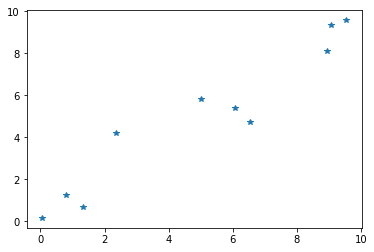

In [7]:
plt.plot(x_data, y_label, '*')

** Variables **

In [8]:
np.random.rand(2)

array([0.68530633, 0.51786747])

In [9]:
m = tf.Variable(0.39)
b = tf.Variable(0.2)

Instructions for updating:
Colocations handled automatically by placer.


### Cost Function

In [10]:
error = tf.reduce_mean(y_label - (m*x_data*b))

### Optimizer

In [11]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

### Initialize Variables

In [12]:
init = tf.global_variables_initializer()

### Saving The Model

In [13]:
saver = tf.train.Saver()

### Create Session and Run!

In [28]:
with tf.Session() as sess:
    sess.run(init)
    
    epochs = 100
    
    for i in range(epochs):
        
        sess.run(train)
        
    # Fetch back the result
    final_slop, final_intercept = sess.run([m, b])
    
    saver.save(sess, '../../models/simple_regression_model.ckpt')

### Evaluate Result

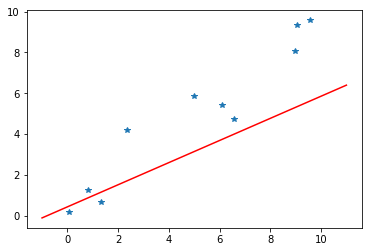

In [17]:
x_test = np.linspace(-1, 11, 10)
y_predict = final_slop*x_test + final_intercept
plt.plot(x_test, y_predict, 'r')
plt.plot(x_data, y_label, '*')

### Loading a Model

In [29]:
with tf.Session() as sess:
    saver.restore(sess, '../../models/simple_regression_model.ckpt')
    
    # Feth back the result
    resore_slope, restore_intercept = sess.run([m, b])

INFO:tensorflow:Restoring parameters from ../../models/simple_regression_model.ckpt


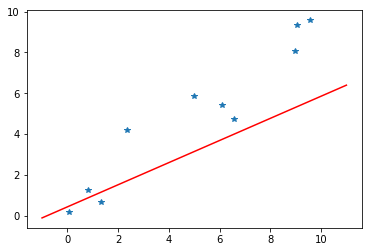

In [30]:
x_test = np.linspace(-1, 11, 10)
y_predict = resore_slope*x_test+restore_intercept
plt.plot(x_test, y_predict, 'r')
plt.plot(x_data, y_label, '*')